# **Final Project (Josh Cacayan)**

**This project gets video game data from two datasets, which involve the ps4 games, xbox games, and other games out there.
The purpose of this project is to measure qualitative and quantitative data from the three data sets, with a bunch of goals when analyzing the three. The following data measured in the experiment involve:**

**Top 10 games from the ps4, xbox one, and other game consoles**

**Merging ps4 games and x box one games and getting the most popular games from the two datasets**

**What Genre do most people play?**

**is there a difference between genre and the type of gaming system one plays?**

**Displaying countries in regards to what games they play (bar chart)**

**Is the xbox one or the ps4 more popular?**






In [34]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# reads 3 datasets for video game sales and their data in regards to: xbox, playstation, and other consoles (nintendo) 
playstationFour = pd.read_csv("foo.csv", encoding='latin1')
xboxOne = pd.read_csv("XboxOne_GameSales.csv" , encoding = 'latin1')
otherVideoGames = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv", encoding = 'latin1')
videoGames = otherVideoGames.drop(['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'], axis = 1)
#top 10 games of ___________ - numbers below the country columns indicate the sale percentage

## **TOP 10 GAMES FOR PLAYSTATION AND XBOX**

**These are the top 10 games for both the playstation and the xbox, as a lot of the games overlap.**

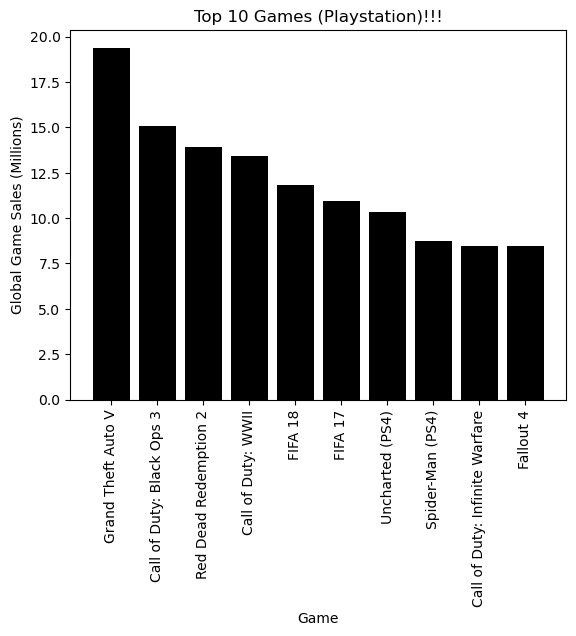

In [35]:
#top 10 games of the playstation 4
playstationFour["Gaming Platform"] = "PS4"
top10playstation = playstationFour.groupby("Game")["Global"].sum()
top10 = pd.DataFrame( {"Global" : top10playstation}, columns = ['Global'] ).sort_values(by = 'Global', ascending = False)
top10.reset_index( level = 0 , inplace = True)
plt.title("Top 10 Games (Playstation)!!!")
plt.xlabel("Game")
plt.ylabel("Global Game Sales (Millions)")
barWidth = .8
ax = plt.subplot()
plt.xticks(rotation = 90)
ps4 = ax.bar(x='Game',height='Global', data= top10[0:10], color = 'black', width=barWidth)

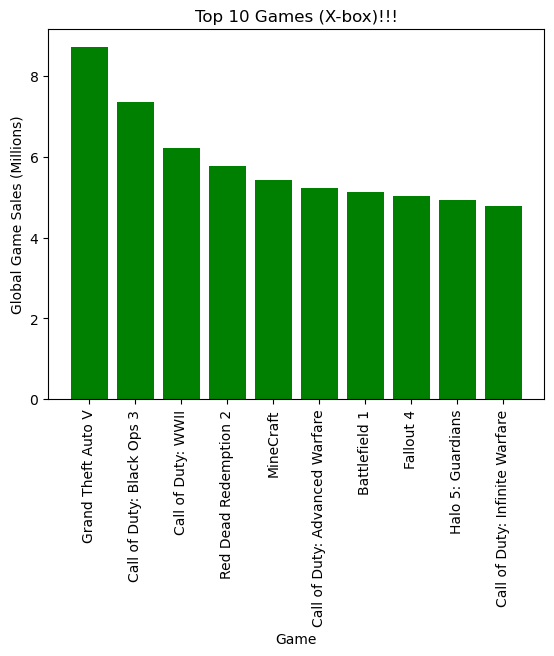

In [36]:
#top 10 games of the xbox one
xboxOneUpdated = xboxOne.drop(["Pos"], axis = 1)
xboxOneUpdated["Gaming Platform"] = "Xbox-One"
top10xbox = xboxOneUpdated.groupby("Game")["Global"].sum()
top10 = pd.DataFrame( {"Global" : top10xbox}, columns = ['Global'] ).sort_values(by = 'Global', ascending = False)
top10.reset_index( level = 0 , inplace = True)
plt.title("Top 10 Games (X-box)!!!")
plt.xlabel("Game")
plt.ylabel("Global Game Sales (Millions)")
barWidth = .8
ax = plt.subplot()
plt.xticks(rotation = 90)
xbox = ax.bar(x='Game',height='Global', data= top10[0:10], color = 'green', width=barWidth)

## **Popular game Genres for both systems**

               Genre  Global
0            Shooter  133.40
1             Action  132.91
2             Sports   92.19
3   Action-Adventure   61.56
4       Role-Playing   60.98
5             Racing   24.39
6           Fighting   19.00
7           Platform   17.44
8          Adventure   13.72
9               Misc   11.68
10             Music    4.71
11        Simulation    4.03
12               MMO    3.42
13             Party    0.61
14          Strategy    0.42
15      Visual Novel    0.28
16            Puzzle    0.23


<BarContainer object of 17 artists>

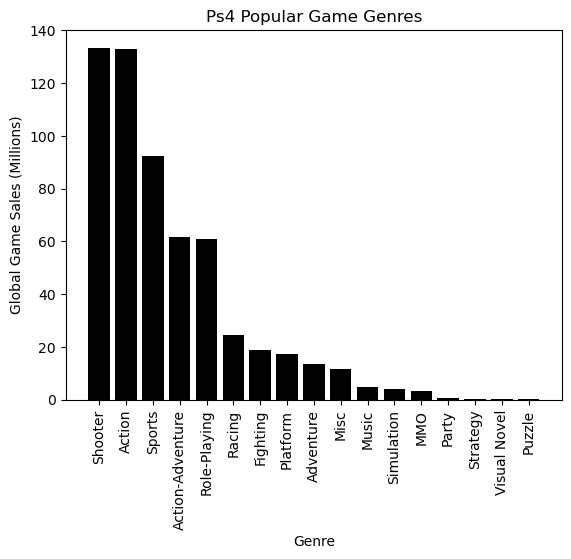

In [37]:
globalGameSalesPs4 = playstationFour.groupby("Genre")["Global"].sum()
ps4AndGenre = pd.DataFrame( {"Global" : globalGameSalesPs4}, columns = ['Global'] ).sort_values(by = 'Global', ascending = False)
ps4AndGenre.reset_index( level = 0 , inplace = True)
print(ps4AndGenre)
plt.title("Ps4 Popular Game Genres")
plt.xlabel("Genre")
plt.ylabel("Global Game Sales (Millions)")
ax = plt.subplot()
plt.xticks(rotation = 90)
barWidth = .8
ax.bar(ps4AndGenre['Genre'], ps4AndGenre['Global'], color = 'black', width=barWidth)

**The most popular games that run with the ps4 are shooter games, action games, and sports games, according to the chart. 

               Genre  Global
0            Shooter   92.21
1             Action   50.51
2             Sports   42.43
3             Racing   17.97
4   Action-Adventure   17.47
5       Role-Playing   16.06
6               Misc    8.89
7           Fighting    6.30
8          Adventure    4.82
9              Music    4.60
10          Platform    2.57
11        Simulation    2.50
12               MMO    1.52
13          Strategy    0.93
14            Puzzle    0.23
15      Visual Novel    0.02


<BarContainer object of 16 artists>

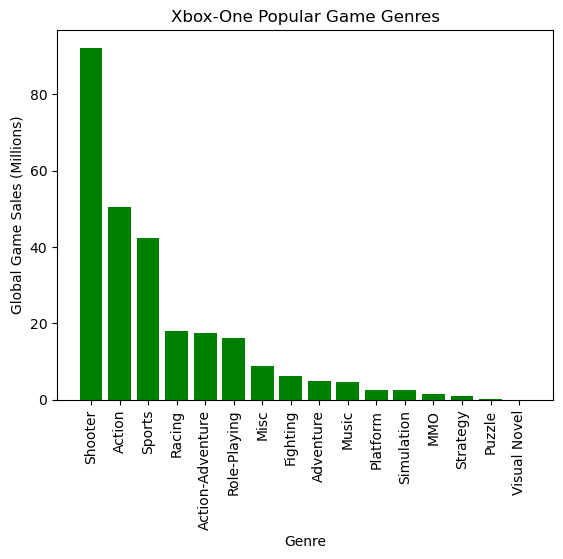

In [38]:
globalGameSalesXbox = xboxOneUpdated.groupby("Genre")["Global"].sum()
xboxOneandGenre = pd.DataFrame( {"Global" : globalGameSalesXbox}, columns = ['Global'] ).sort_values(by = 'Global', ascending = False)
xboxOneandGenre.reset_index( level = 0 , inplace = True)
print(xboxOneandGenre)
plt.title("Xbox-One Popular Game Genres")
plt.xlabel("Genre")
plt.ylabel("Global Game Sales (Millions)")
ax = plt.subplot()
plt.xticks(rotation = 90)
ax.bar(xboxOneandGenre['Genre'], xboxOneandGenre['Global'], color = 'g')

**In this dataset, the most popular game genres for the x box include shooter, action, & sports.**

**Both of these datasets have similar trends, with shooting, action, and sports being the most popular games. There are more global game sales in the ps4 due to the fact that there are more people who play the ps4 compared to the xbox-one. More people play shooter games compared to the other games in the xbox while  the ps4 is more widespread.**

## **Merging the Data Together**

**This dataset merges both the x box and ps4 data together.

In [39]:
allVideoGamesOne = playstationFour.merge(xboxOneUpdated, how = 'outer').sort_values(by="Global", ascending = False)
top10Games = pd.DataFrame({'Game': allVideoGamesOne['Game'],'Global':allVideoGamesOne["Global"] , 'Gaming Platform': allVideoGamesOne['Gaming Platform']}).sort_values(by = 'Global', ascending = False)[0:10]
print(top10Games)

                          Game  Global Gaming Platform
0           Grand Theft Auto V   19.39             PS4
1    Call of Duty: Black Ops 3   15.09             PS4
2        Red Dead Redemption 2   13.94             PS4
3           Call of Duty: WWII   13.40             PS4
4                      FIFA 18   11.80             PS4
5                      FIFA 17   10.94             PS4
6              Uncharted (PS4)   10.33             PS4
7             Spider-Man (PS4)    8.76             PS4
422         Grand Theft Auto V    8.72        Xbox-One
9                    Fallout 4    8.48             PS4


**These are the top 10 games in regards to the x-box one and the ps4 combined. There are more Ps4 top 10s as there are more people playing the ps4. There are duplicate games within the data, due to the fact that the ps4 and xbox sell similar games, showing how popular the game in general is. 

               Genre  Global
0            Shooter  225.61
1             Action  183.42
2             Sports  134.62
3   Action-Adventure   79.03
4       Role-Playing   77.04
5             Racing   42.36
6           Fighting   25.30
7               Misc   20.57
8           Platform   20.01
9          Adventure   18.54
10             Music    9.31
11        Simulation    6.53
12               MMO    4.94
13          Strategy    1.35
14             Party    0.61
15            Puzzle    0.46
16      Visual Novel    0.30


<BarContainer object of 17 artists>

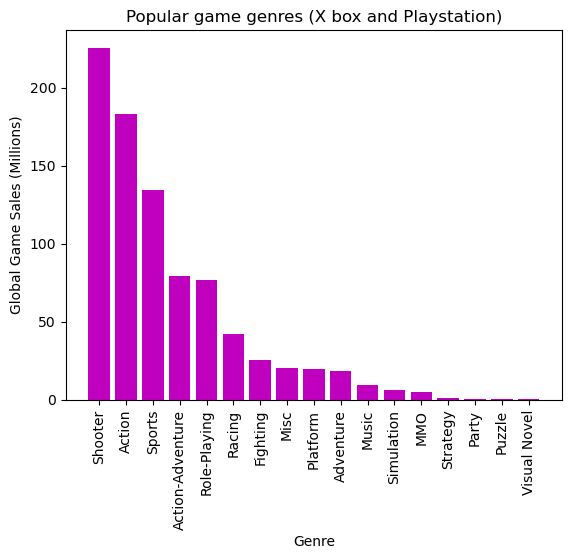

In [40]:
globalGameSales = allVideoGamesOne.groupby("Genre")["Global"].sum()
globalGameGenre = pd.DataFrame( {'Global' : globalGameSales}, columns = ['Global'] ).sort_values(by = 'Global', ascending = False)
globalGameGenre.reset_index( level = 0 , inplace = True)
print(globalGameGenre)
plt.title("Popular game genres (X box and Playstation)")
plt.xlabel("Genre")
plt.ylabel("Global Game Sales (Millions)")
ax = plt.subplot()
plt.xticks(rotation = 90)
ax.bar(globalGameGenre['Genre'], globalGameGenre['Global'], color='m', width=.8)

**Combined together, the most popular genre that the x box and ps4 sell in common were shooter games, showing that most people who play on these consoles play these specific genres.

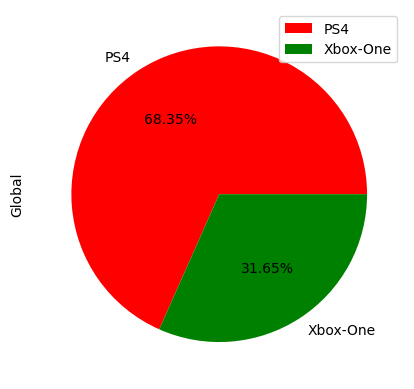

In [50]:
xBoxVsPs4 = allVideoGamesOne.groupby(['Gaming Platform']).sum().plot(kind = 'pie', y = 'Global', autopct = "%.2f%%", colors = ['red', 'green'])

**According to the bar chart, most people play the ps4 compared to the x box one**

## **Other Games**

**Moving on, I will be adding a third dataset, with this dataset containing games that were popular around 2016.**

In [42]:
othervideogames = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
videoGameDataFrame = othervideogames.rename(columns={ "Name": "Game", "Year_of_Release": "Year", "NA_Sales": "North America", "EU_Sales": "Europe", "JP_Sales" : "Japan", "Other_Sales": "Rest of World", "Global_Sales": "Global" })  
videoGameDataFrame["Gaming Platform"] = videoGameDataFrame["Platform"]
newGameData = videoGameDataFrame.drop(["Platform","Critic_Score", "Critic_Count", "User_Score", "User_Count", "Developer", "Rating"], axis = 1)
top10OtherGames = pd.DataFrame({'Game': newGameData['Game'] , 'Genre': newGameData['Genre'],  'Global': newGameData['Global']})
top10OtherGames[0:10]
#videoGameDataFrame= pd.DataFrame({"Game": "Name", "Year" : "Year_of_Release", "North America": "NA_Sales", "Europe": "EU_Sales", "Japan": "JP_Sales", "Rest of World": "Other_Sales", "Global": "Global_Sales" }, columns = ["Game", "Year", "North America", "Europe", "Japan", "Rest of World", "Other_Sales", "Global"], index = None)

,Game,Genre,Global
0,Wii Sports,Sports,82.53
1,Super Mario Bros.,Platform,40.24
2,Mario Kart Wii,Racing,35.52
3,Wii Sports Resort,Sports,32.77
4,Pokemon Red/Pokemon Blue,Role-Playing,31.37
5,Tetris,Puzzle,30.26
6,New Super Mario Bros.,Platform,29.80
7,Wii Play,Misc,28.92
8,New Super Mario Bros. Wii,Platform,28.32
9,Duck Hunt,Shooter,28.31


**These are the top 10 games globally, with wii sports being the number one game on this dataset. It is a sudden change from shooter games being one of the most popular genres being in top 10 to only one of the top 10 games being a shooter.**

Text(0.5, 1.0, 'Popular game genres (Other games outside of ps4 and xbox)')

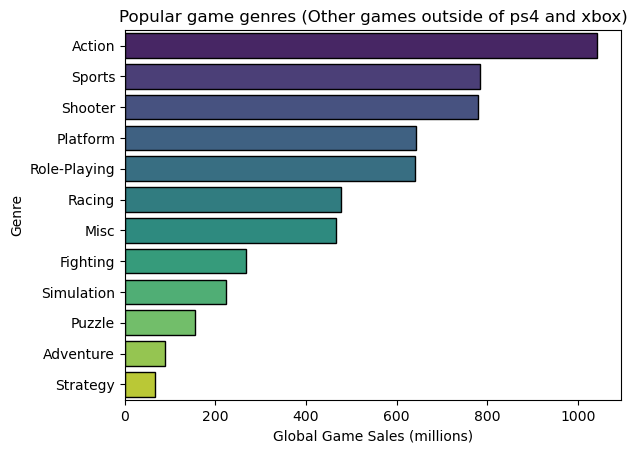

In [43]:
globalGameSales = newGameData.groupby("Genre")["Global"].sum()
globalGameGenre = pd.DataFrame( {'Global' : globalGameSales}, columns = ['Global'] ).sort_values(by = 'Global', ascending = False)
globalGameGenre.reset_index( level = 0 , inplace = True)
sns.light_palette("seagreen", as_cmap=True)
sns.barplot(x='Global', y='Genre', data = globalGameGenre, ci=None, edgecolor = 'black', palette="viridis")
plt.xlabel("Global Game Sales (millions)")
plt.ylabel("Genre")
plt.title("Popular game genres (Other games outside of ps4 and xbox)")

**This chart above gets the popular video game genres for games outside of the ps4 and xbox games, with action being the most popular genre as popular publishers like nintendo make a lot of action games such as monster hunter and legend of zelda.**

## **Merging all of the data**

**This is all of the datasets which include the ps4 games, the xbox one games,and other systems combined into one table.**

In [44]:
allVideoGames=newGameData.merge(allVideoGamesOne ,  how = 'outer').sort_values(by="Global", ascending = False)
allVideoGames[0:20]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Gaming Platform
0,Wii Sports,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,Wii
1,Super Mario Bros.,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NES
2,Mario Kart Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,Wii
3,Wii Sports Resort,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,Wii
4,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,GB
5,Tetris,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,GB
6,New Super Mario Bros.,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,DS
7,Wii Play,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,Wii
8,New Super Mario Bros. Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,Wii
9,Duck Hunt,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NES


**Looking at all of the video game data all together, we can see that the top 20 games mostly come from nintendo, with the exception of grand theft auto being  top 16 and 17. This shows that most people worldwide play games trademarked by nintendo.**

**Now time to see how the most popular genres change, adding the ps4, xbox one, and other game system datasets together to one table.**

               Genre   Global
0             Action  1226.42
1            Shooter  1005.58
2             Sports   918.41
3       Role-Playing   717.16
4           Platform   663.45
5             Racing   519.37
6               Misc   486.05
7           Fighting   292.98
8         Simulation   229.15
9             Puzzle   154.92
10         Adventure   107.86
11  Action-Adventure    79.03
12          Strategy    66.98
13             Music     9.31
14               MMO     4.94
15             Party     0.61
16      Visual Novel     0.30


Text(0.5, 1.0, 'Popular game genres X-box, Playstation, Nintendo, etc.')

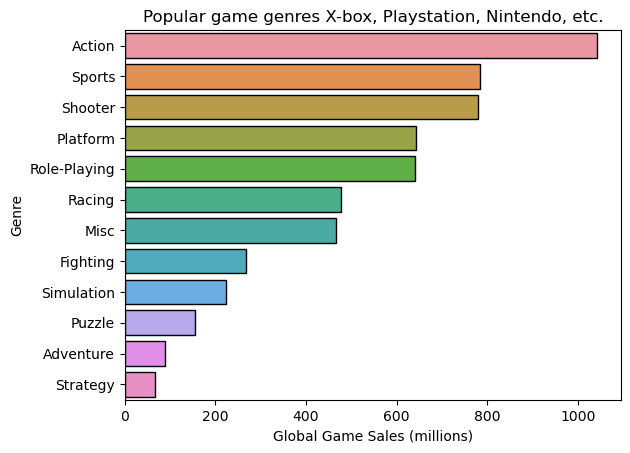

In [45]:
globalGameSalesAll = allVideoGames.groupby("Genre")["Global"].sum()
globalGameGenreAll = pd.DataFrame( {"Global" : globalGameSalesAll}, columns = ['Global'] ).sort_values(by = 'Global', ascending = False)
globalGameGenreAll.reset_index( level = 0 , inplace = True)
print(globalGameGenreAll)
sns.barplot(x='Global', y='Genre', data = globalGameGenre, ci=None, edgecolor = 'black')
plt.xlabel("Global Game Sales (millions)")
plt.ylabel("Genre")
plt.title("Popular game genres X-box, Playstation, Nintendo, etc.")
#popularSystems = allVideoGames.groupby(['Publisher']).sum().plot(kind = 'pie', y = 'Global')

**Combining all of the data together, there were some changes in regards to the most popular genres played today. Action has become the most popular genre, as there aren't many shooting games published by nintendo, the most popular video company according to the datasets. Nintendo has published a lot of action games,such as legend of zelda, and smash bros.**

**In addition to action games being the most popular genre, platformer games has become the 5th most popular genre, as super mario bros, a popular 2d platformer game, is one of the major symbols in video games.**

**Now that all of the data is combined into one table, finding out  we can now take into account other video game sale data.**

**Some measurements that we will be taking into account include:**
    
    -What platforms were the the most popular?
    
    -What genres of games do other countries like to play?

### **What platforms are the most popular?**

**Using a pie chart, we will be able to see the percentages of how popular each gaming system is.**

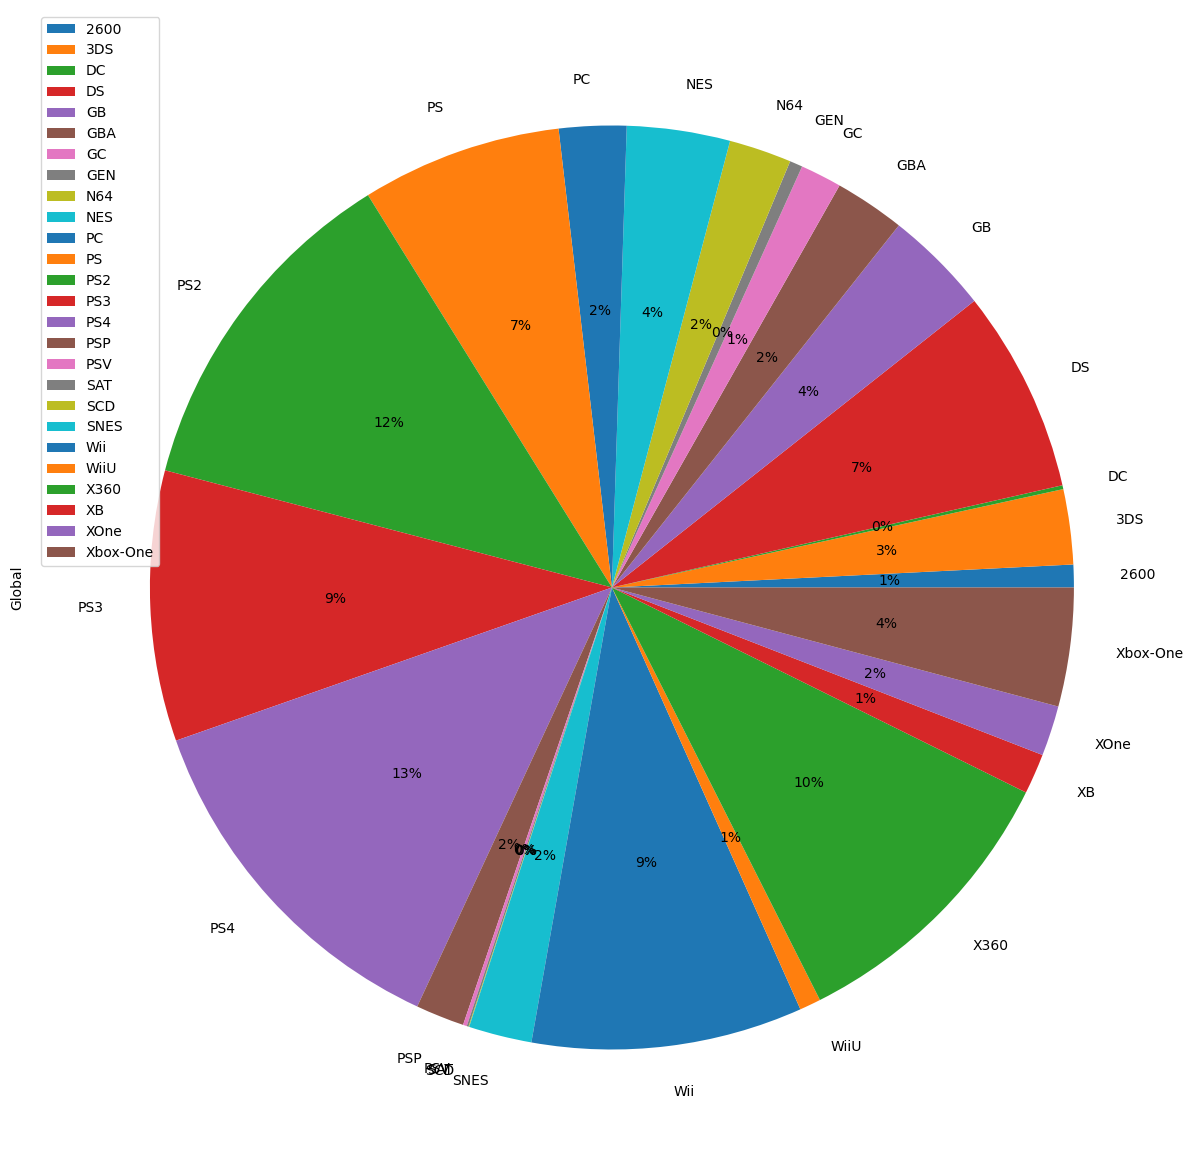

In [46]:
palette_color = sns.color_palette('bright') 
  
alllVideogamesBar = allVideoGames.groupby(['Gaming Platform']).sum().plot(kind = 'pie', y = 'Global', autopct = "%.0f%%", figsize=(15,15))


**Looking at the pie chart, we can see that the biggest systems that are played up to 2016 are the wii, the playstation systems(systems with PS), and the xbox systems (systems with X at the start) with the most popular one being the x360 even if the x box one is the modern version.**

**While most games come from the playstation and the xbox games, there are also a lot of games that use nintendos products.**

**In fact, the systems that nintendo owns are most systems in this bar chart except the playstation systems, pc, and the the xbox systems**

### **What Genre Each Country likes to play**

**Using three bar charts, we are able to see how a game sales in regards to genre is affected by a country.**

### **North America**

Text(0.5, 1.0, 'Popular game genres (NA)')

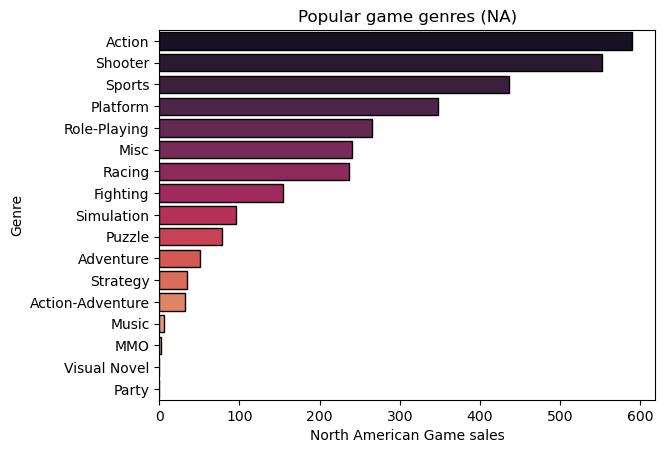

In [47]:
northAmerica = allVideoGames.groupby("Genre")["North America"].sum()
northAmerica = pd.DataFrame( {"North America" : northAmerica}, columns = ['North America'] ).sort_values(by = 'North America', ascending = False)
northAmerica.reset_index( level = 0 , inplace = True)
sns.barplot(x='North America', y='Genre', data = northAmerica, ci=None, edgecolor = 'black', palette="rocket")
plt.xlabel("North American Game sales")
plt.ylabel("Genre")
plt.title("Popular game genres (NA)")

###  **Japan** 

Text(0.5, 1.0, 'Popular game genres (Japan)')

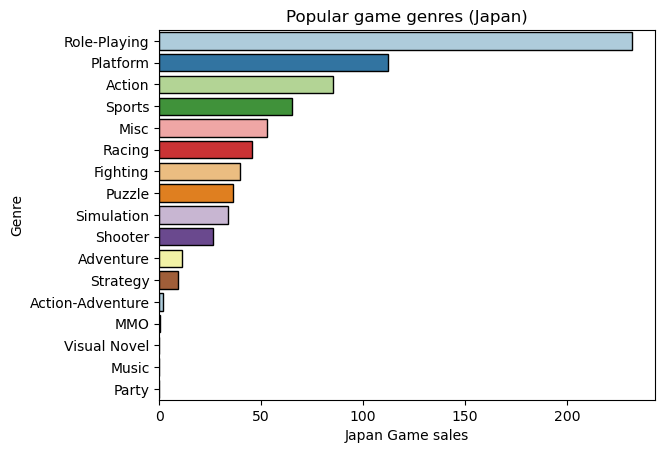

In [48]:
japan = allVideoGames.groupby("Genre")["Japan"].sum()
japan = pd.DataFrame( {"Japan" : japan}, columns = ['Japan'] ).sort_values(by = 'Japan', ascending = False)
japan.reset_index( level = 0 , inplace = True)
sns.barplot(x='Japan', y='Genre', data = japan, ci=None, edgecolor = 'black', palette="Paired")
plt.xlabel("Japan Game sales")
plt.ylabel("Genre")
plt.title("Popular game genres (Japan)")

### **Europe** 

Text(0.5, 1.0, 'Popular game genres (Europe)')

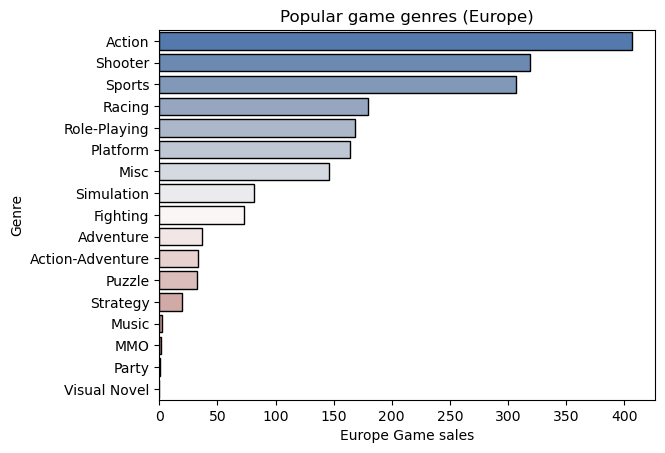

In [49]:
europe = allVideoGames.groupby("Genre")["Europe"].sum()
sns.light_palette("seagreen", as_cmap=True)
europe = pd.DataFrame( {"Europe" : europe}, columns = ['Europe'] ).sort_values(by = 'Europe', ascending = False)
europe.reset_index( level = 0 , inplace = True)
sns.barplot(x='Europe', y='Genre', data = europe, ci=None, edgecolor = 'black', palette="vlag")
plt.xlabel("Europe Game sales")
plt.ylabel("Genre")
plt.title("Popular game genres (Europe)")

**Looking at the three country datasets, both Europe and America love action and shooter games, as its mostly because of how the playstation and x box systems are popular in both countries.**

**While Europe and North America had similar genres to each other, Japan has very different preferences for what games they play, as the top 3 genres for gaming are roleplaying games, platform games, and action games.**

**This is most likely due to the fact that xbox and playstation games are not as popular as games made by nintendo, as those consoles come from American companies while nintendo is a big japanese gaming company.**

**There is also more data based on America and Europe, as the dataset was most likely composed of people who reside in the US, as there aren't a lot of japanese games in this list.**

## **What was the biggest year for gaming?**

Text(0.5, 1.0, 'Years of Gaming')

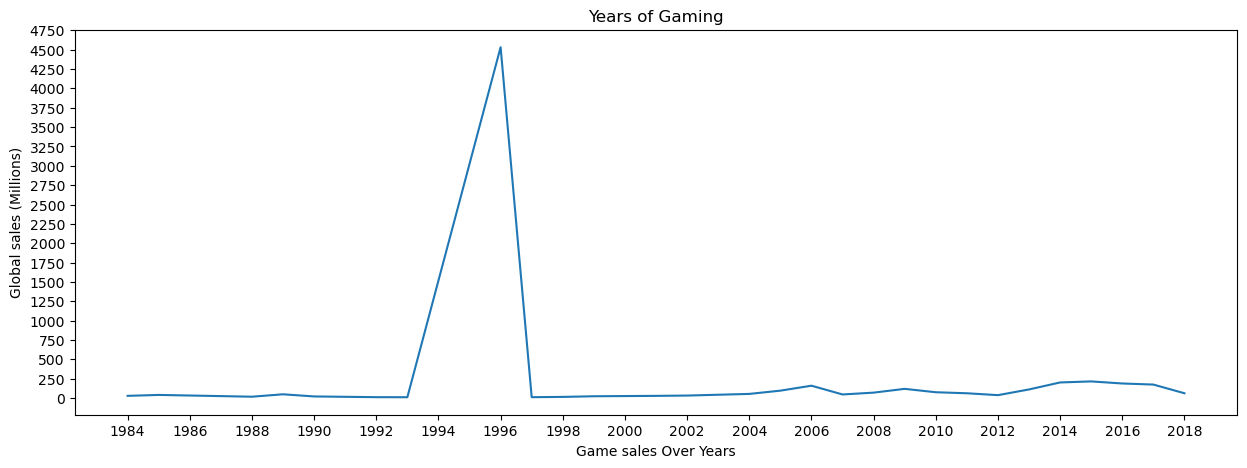

In [79]:
yearsOfGaming = allVideoGames.groupby("Year")["Global"].sum()
years = pd.DataFrame( {"Global" : yearsOfGaming}, columns = ['Global'] ).sort_values(by = 'Global', ascending = False)
plt.figure(figsize=(15,5))
plt.locator_params(axis= 'x', nbins= 20)
plt.locator_params(axis= 'y', nbins= 20)
sns.lineplot(data= years,x="Year", y="Global")
plt.xlabel("Game sales Over Years")
plt.ylabel("Global sales (Millions)")
plt.title("Years of Gaming")

**According to the dataset, the year with the best games was around the 1990 time period reaching more than 4000 global sales worldwide.**

**Conclusions

**According to the two datasets in regards to global game sales, the most popular genres that people play on the x box  and the playstation are shooters, action, and sports games. The data is similar in regards to the genre due to the fact that both of the systems share popular games, as there is most likely a x box copy of a game that was on the ps4. Both are also made on the same time, making the games similar to one another.** 

**When other games merged with the ps4 and xbox datasets, there was more variety in the genre of games people play, as a lot of platformer / roleplaying games mostly came from other systems outside of those two.**


**One suprising factor that was found out in the experiment was how big the gap was between the ps4 players and the x box - one players is on the merged datasets. This is most likely due to the fact that the ps4 has many advantages involving the cheaper price, how it looks, and that ps4 games have a higher resolution compared to the xbox one according to:**https://www.ps4home.com/top-7-reasons-why-the-ps4-is-currently-more-popular-than-the-xbox-one/#:~:text=Top%207%20Reasons%20why%20the%20PS4%20is%20currently,...%207%207.%20The%20PS4%E2%80%99s%20UI%20%28user%20interface%29**

**Another surprising factor was how different the japanese genres were from the american and european genres. Japan likes genres such as roleplaying games and platform games. This is mostly because a lot of these games originated from Japan, with nintendo making titles such as mario bros, legend of zelda, final fantasy and more. This is a link to most of the popular roleplaying games in japan.  https://en.wikipedia.org/wiki/Video_games_in_Japan**



